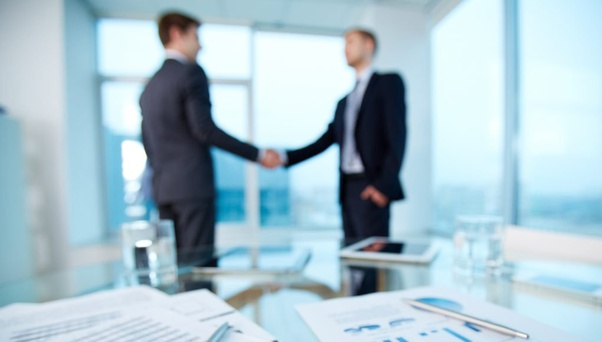

Part of the role of the data scientist is to create learning models to solve business problems. In this project, we try to address one of these problems. Here, we are interested in a set of data from a company that is looking for an algorythmic model that can predict whether or not a customer wants to stop using a company's services. In order to do this, the company makes available data on different customers. On the basis of this data, our objective is to build the best model capable of predicting the resignation of a customer. Solving this problem is very important because the company will then be able to act on customers who can leaving of their services.


This project is divided into 2 parts: 
- Firstly, we analyse differents informations from the dataset. To do this, we analyse the different independent variables and then compare them with each other. We want to determine whether a variable has an influence on the customer's choice to leave the company. 
- Secondly, we create different models and compare their scores. We specifically select the model that will have the best predictive score on customers. 
- Finally, we conclude on the results of the model. Depending on its score, we determine whether it's interesting for the company to keep it for future data.

#First part : **Visualization**

## 1 - Variable analysis

First of all, we import the different libraries needed to transfer and analyse our python data table.

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("../input/credit-card-customers/BankChurners.csv")

In [ ]:
df.head()

In [ ]:
print('This dataset contains {} lines and {} columns.'.format(df.shape[0], df.shape[1]))

In [ ]:
df.columns

Here is the different dataset variables that we have :

'**Clientium**' : Unique ID for each customer.

'**Attrition_flag**': (Customer activity). Determines whether the customer has an open account or not. This is our target variable

'**Customer_Age**': Age (in years) for each customer.

'**Gender**': Two types : M like Male, F like Female.

'**Dependent_count**': Number of bank accounts for each customer.

'**Education_Level**': Educational level of the account holder.

'**Marital_Status**': 4 types : Married, Single, Divorced and unknown.

'**Income_Category**': Annual Income Category of the account holder

'**Card_Category**': 4 Type of Card : Blue, Silver, Gold and Platinum

'**Months_on_book**': Period of relationship with bank.

'**Total_Relationship_Count**': Total number of products held by the customer.

'**Months_Inactive_12_mon**': Number of  inactive Months in the last 12 months.

'**Contacts_Count_12_mon**': Number of  customer Contacts in the last 12 months.

'**Credit_Limit**': Credit card transaction limit per customer.

'**Total_Revolving_Bal**': Total Revolving Balance on the Credit Card.

'**Avg_Open_To_Buy**': Open to Buy Credit Line (Average of last 12 months.)

'**Total_Amt_Chng_Q4_Q1**': Change in Transaction Amount (Q4 over Q1).

'**Total_Trans_Amt**': Total amount of  transaction (Last 12 months).

'**Total_Trans_Ct**': Total number of transaction Count (Last 12 months).

'**Total_Ct_Chng_Q4_Q1**': Change in Transaction Count (Q4 over Q1).

'**Avg_Utilization_Ratio**': Average credit card usage ratio.

The two last variables are not interesting for analysis. That's why we drop these variables.

In [ ]:
df2 = df.iloc[:, :-2]

In [ ]:
df2.head()

In [ ]:
df2.isna().sum()

We have no missing values in this dataset (because 0 missing values in each column). 

In [ ]:
df2.describe()

With this code, we have informations on some statistical data of the numerical variables of our dataset. For example, we know that the mean of Customer_Age in this dataset is 46.33 or the max value of "Months_on_book" variable is 56.

## 2- Visualization of numerical and categorical variables

### 2-1 Informations about columns

In this part, we visualize the different variables and their distributions. For this, we separate our dataset in 2 parts: Categorical variables and numerical variables. Object" type columns have 'str' type data while numeric columns have "int" or "float" type data. 

In [ ]:
df2.info()

In [ ]:
print("The number of object variables columns is : {}".format(len(df2.select_dtypes(['object']).columns)))
print("The number of numerical variables columns is : {}".format(len(df2.select_dtypes(['int', 'float']).columns)))

In [ ]:
print("Number of unique values for each object variables columns :")
print()
print(df2.select_dtypes(['object']).nunique())

Here, we have the number of unique object variable for each object columns. Not all category of columns are displayed here (e.g. numérical categories). 

Now, we display the number of times each categorical variable of type "object" appears.

In [ ]:
print("Number of customers in this dataset : ")
print()
display(df2["Attrition_Flag"].value_counts())
print()
print("......................................................")
print("Gender in this dataset : ")
print()
display(df2["Gender"].value_counts())
print()
print("......................................................")
print("Number of different Income category in this dataset : ")
print()
display(df2["Income_Category"].value_counts())
print()
print("......................................................")
print("Number of different Education level in this dataset : ")
print()
display(df2["Education_Level"].value_counts())
print()
print("......................................................")
print("Number of different Marital status in this dataset : ")
print()
display(df2["Marital_Status"].value_counts())
print()
print("......................................................")
print("Number of different card_category in this dataset : ")
print()
display(df2["Card_Category"].value_counts())
print()

A very important information is in the "Attrited_flag" column. This column is our target variable that we want to predict later. We observe that the variable "Existing_customers" is more present than the variable "Attrited_customers". This **IMBALANCED** is necessary to observe because the processing and prediction of models will be different.

### 2-2 Graphic visualization of the dataset 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Graphical separation and analysis of **numerical** and **categorical** variables : 

1. Numerical columns 

To begin with graphical analysis, we first look at variables of numerical types.

In [ ]:
numerical_column = df2.select_dtypes(['int', 'float'])
numerical_column.head()

In this dataset, the variable "age" can have an influence on the other numerical variables. First, let's try to see the distribution of all our data and then the influence of age on the other numerical data.

In [ ]:
numerical_column_mean = numerical_column.groupby(['Customer_Age']).aggregate('mean')
numerical_column_mean.head()

The variable "clientnum" is like in SQL, a **primary key**. It assigns a unique value for each line of our dataset and each line becomes a unique value. However, it does not give any statistical value and has no influence on our initial problem. This is why we are going to delete this column :

In [ ]:
numerical_column_mean_test = numerical_column_mean.iloc[:, 1:]
numerical_column_mean_test.head()

To determine the influence of age in each numerical variable, we performed a "groupby" and a mean. We can observe graphically what's happens:

In [ ]:
numerical_column_mean_test.shape

We have 13 columns containing numerical values and 45 rows corresponding to each age.

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(35,30))
for i, axi in enumerate(ax.flat):
  axi.bar(numerical_column_mean_test.iloc[:, 0].index, numerical_column_mean_test.iloc[:,i])
  axi.set(xlabel= 'Customer_Age', ylabel = numerical_column_mean_test.columns[i])
fig.suptitle("Distribution of different numerical variables with age of customers", fontsize = 20, y = 0.93)
plt.gcf().set_size_inches(20,20)
plt.show()

With these different graphics, we observe the distribution of all the numerical variables according to the age of the customers. We obtain an overall observation of the distribution of the numerical variables as a function of the age of our dataset.

For example, in the 1st graph, we can analyse more "dependent_count" among customers who are on average between 40 and 50 years old. In the 2nd graph, we observe an increase in the variable "month_of_book" among the oldest clients. 

In conclusion about some graphs : we can therefore be seen that "age" variable has an influence on certain numerical variables.

2. Categorical columns

After that, we want to observe the influence of different categorical variables of type "object" and observe a difference in "Attrited_customers" and "Existing_customers" (both types of customers in this dataset). 

In [ ]:
groups = ["Attrition_Flag", "Gender", "Dependent_count", "Income_Category", "Education_Level", "Marital_Status", "Card_Category", "Total_Relationship_Count", "Months_Inactive_12_mon", "Contacts_Count_12_mon"]
categorical_column = df2.loc[:, groups]

In [ ]:
categorical_column.head(2)

In [ ]:
categorical_column.columns

In [ ]:
#visualisation : 
fig, ax = plt.subplots(5,2 , figsize = (25, 25))
fig.suptitle("Counting graph of the different types of categorical data", fontsize = 20, y = 0.90)
sns.countplot(ax = ax[0,0], x= categorical_column[categorical_column.columns[0]], data=categorical_column)
sns.countplot(ax = ax[0,1], x= categorical_column[categorical_column.columns[1]], data=categorical_column)
sns.countplot(ax = ax[1,0], x= categorical_column[categorical_column.columns[2]], data=categorical_column)
sns.countplot(ax = ax[1,1], x= categorical_column[categorical_column.columns[3]], data=categorical_column, order = ["Unknown", "Less than $40K",'$40K - $60K', "$60K - $80K", "$80K - $120K", "$120K +"])
sns.countplot(ax = ax[2,0], x= categorical_column[categorical_column.columns[4]], data=categorical_column, order = ['Unknown', 'Uneducated', 'High School', 'Graduate', 'College', 'Post-Graduate', 'Doctorate'])
sns.countplot(ax = ax[2,1], x= categorical_column[categorical_column.columns[5]], data=categorical_column)
sns.countplot(ax = ax[3,0], x= categorical_column[categorical_column.columns[6]], data=categorical_column, order = ['Blue', 'Silver', 'Gold', 'Platinum'])
sns.countplot(ax = ax[3,1], x= categorical_column[categorical_column.columns[7]], data=categorical_column)
sns.countplot(ax = ax[4,0], x= categorical_column[categorical_column.columns[8]], data=categorical_column)
sns.countplot(ax = ax[4,1], x= categorical_column[categorical_column.columns[9]], data=categorical_column)

Using these graphs, we analyse the proportion of each category for each categorical variable. 
For example, in this dataset, we have more customers with an annual salary below $40k. In addition, we have more than 8,000 people who have remained customers at the bank compared to about less than 2,000 "attrited customers".

What's interesting now is to determine for each category the number of customers (e.g. Gender) and there types (Attrited or Existing). Perhaps we could find a category that influences the client's choice to leave the company's services (e.g. salary).

In [ ]:
fig, ax = plt.subplots(5,2 , figsize = (30, 30))
fig.suptitle("Different count graph for categorical data depending on type of customers", fontsize = 20, y = 0.90)
ax1 = sns.countplot(ax = ax[0,0], x= categorical_column[categorical_column.columns[0]], data=categorical_column)
sns.countplot(ax = ax[0,1], x= categorical_column[categorical_column.columns[1]], data= categorical_column, hue = categorical_column[categorical_column.columns[0]])
sns.countplot(ax = ax[1,0], x= categorical_column[categorical_column.columns[2]], data= categorical_column, hue = categorical_column[categorical_column.columns[0]])
sns.countplot(ax = ax[1,1], x= categorical_column[categorical_column.columns[3]], data= categorical_column, hue = categorical_column[categorical_column.columns[0]], order = ["Unknown", "Less than $40K",'$40K - $60K', "$60K - $80K", "$80K - $120K", "$120K +"])
sns.countplot(ax = ax[2,0], x= categorical_column[categorical_column.columns[4]], data= categorical_column, hue = categorical_column[categorical_column.columns[0]], order = ['Unknown', 'Uneducated', 'High School', 'Graduate', 'College', 'Post-Graduate', 'Doctorate'])
sns.countplot(ax = ax[2,1], x= categorical_column[categorical_column.columns[5]], data= categorical_column, hue = categorical_column[categorical_column.columns[0]])
sns.countplot(ax = ax[3,0], x= categorical_column[categorical_column.columns[6]], data= categorical_column, hue = categorical_column[categorical_column.columns[0]], order = ['Blue', 'Silver', 'Gold', 'Platinum'])
sns.countplot(ax = ax[3,1], x= categorical_column[categorical_column.columns[7]], data= categorical_column, hue = categorical_column[categorical_column.columns[0]])
sns.countplot(ax = ax[4,0], x= categorical_column[categorical_column.columns[8]], data= categorical_column, hue = categorical_column[categorical_column.columns[0]])
sns.countplot(ax = ax[4,1], x= categorical_column[categorical_column.columns[9]], data= categorical_column, hue = categorical_column[categorical_column.columns[0]])

The objective of this analysis is to be able to determine a categorical variable that has more influence on "Attrited_customers" rather than "Existing_customers". 
According to the result of this graph, we observe the same proportion of "Existing customers" and "Attrited_customers" for all object variables. 
With these results, we confirm that the customer is not directly influenced according to a specific category. Perhaps, we need to look at several factors. 

Then, we analyse these different object categorical variables according to the type of customer, but adding the variable "age" of the customer. 

In [ ]:
df2.head()

In [ ]:
df2['Customer_Age_slice'] = df2['Customer_Age'].apply(lambda x: "0-30" if x <= 30 
                                                      else "31-40" if (x >= 31) and (x <= 40) 
                                                      else "41-50" if (x >= 41) and (x <= 50) 
                                                      else "51-60" if (x >= 51) and (x <= 60) 
                                                      else "+60")                                                                                                                                                                                                                                                                                                            

In [ ]:
df2['Customer_Age_slice'].unique()

We create customer categories by "age", with a group of young customers from 0 to 30 years old up to the oldest customers over 60 years old. This makes it easier to observe and interpret the graphs.

In [ ]:
fig, ax = plt.subplots(5,2 , figsize = (30, 30))
fig.suptitle("Comparison of the different object categorical variables in relation to the client type according to the age group", fontsize = 20, y = 0.90)
sns.countplot(ax = ax[0,0], x = df2['Customer_Age_slice'], hue = df2['Attrition_Flag'], order = ['0-30', '31-40', '41-50', '51-60', '+60'])
sns.barplot(ax = ax[0,1], x = df2['Customer_Age_slice'], y =  df2['Credit_Limit'], data = df2, hue = df2['Attrition_Flag'], order = ['0-30', '31-40', '41-50', '51-60', '+60'])
sns.barplot(ax = ax[1,0], x = df2['Customer_Age_slice'], y =  df2['Total_Revolving_Bal'], data = df2, hue = df2['Attrition_Flag'], order = ['0-30', '31-40', '41-50', '51-60', '+60'])
sns.barplot(ax = ax[1,1], x = df2['Customer_Age_slice'], y =  df2['Avg_Open_To_Buy'], data = df2, hue = df2['Attrition_Flag'], order = ['0-30', '31-40', '41-50', '51-60', '+60'])
sns.barplot(ax = ax[2,0], x = df2['Customer_Age_slice'], y =  df2['Total_Amt_Chng_Q4_Q1'], data = df2, hue = df2['Attrition_Flag'], order = ['0-30', '31-40', '41-50', '51-60', '+60'])
sns.barplot(ax = ax[2,1], x = df2['Customer_Age_slice'], y =  df2['Total_Trans_Amt'], data = df2, hue = df2['Attrition_Flag'], order = ['0-30', '31-40', '41-50', '51-60', '+60'])
sns.barplot(ax = ax[3,0], x = df2['Customer_Age_slice'], y =  df2['Total_Trans_Ct'], data = df2, hue = df2['Attrition_Flag'], order = ['0-30', '31-40', '41-50', '51-60', '+60'])
sns.barplot(ax = ax[3,1], x = df2['Customer_Age_slice'], y =  df2['Total_Ct_Chng_Q4_Q1'], data = df2, hue = df2['Attrition_Flag'], order = ['0-30', '31-40', '41-50', '51-60', '+60'])
sns.barplot(ax = ax[4,0], x = df2['Customer_Age_slice'], y =  df2['Avg_Utilization_Ratio'], data = df2, hue = df2['Attrition_Flag'], order = ['0-30', '31-40', '41-50', '51-60', '+60'])           

With these graphics, we do not look at the imbalance between "Existing" and "Attrited" customers. However, we can look according to the age range of the two types of customers, if one of the two types are more numerous. This allows us to observe which numerical variable, depending on the age group, is a factor for the customer to want to leave the company's services or not.

Contrary to the previous graphs, we can see some differences between the two types of customers (because the imbalance is not represented in the graphs).
For example, "existing" customers between the ages of 30 and 60 made more transactions with larger amounts than "attrited" customers.

In conclusion from these observations, what will be important for training and model prediction is the influence of several explanatory variables. 
If we look separately at the explanatory variables according to the type of client, we do not observe any significant differences. 

So, We assume that all the explanatory variables and their interactions with each other are necessary to predict the type of customer.  

In [ ]:
df2 = df2.drop(columns = ['Customer_Age_slice'], axis = 1)
len(df2.columns)

#Second Part : **Model creation**

##1 - Preprocessing

### 1-1 Transformation of categorical data into numerical data

In this section, we first perform a pre-processing of the different variables. This consists of preparing our data for our machine learning model. For training, a model needs numerical data.  
We will therefore transform the non-numerical data into numerical data :  

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_column.Attrition_Flag.unique()

In [ ]:
categorical_column.head(2)

In [ ]:
categorical_column['Attrition_Flag'] = categorical_column['Attrition_Flag'].apply(lambda x: x.replace('Existing Customer', '0').replace('Attrited Customer', '1'))
categorical_column['Attrition_Flag'] = categorical_column['Attrition_Flag'].astype(int)

We treat specifically with the 'Attrition_flag' column because it's our target variable.

In [ ]:
categorical_column.head()

In [ ]:
column_number = ['Attrition_Flag', 'Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', "Contacts_Count_12_mon"]
categorical_column_with_number = categorical_column.loc[:, column_number]
categorical_column = categorical_column.drop(columns = column_number, axis = 1)
categorical_column.head(2)

In [ ]:
LE = LabelEncoder()
for i in categorical_column.columns :
  categorical_column[i] = LE.fit_transform(categorical_column[i])
categorical_column.head()

In [ ]:
categorical_column_clean = pd.concat([categorical_column_with_number, categorical_column], axis = 1)

In [ ]:
categorical_column_clean.head()

We have separated the categorical variables which are of type 'Int' with the 'str' so that the "Label_encoder" tool converts only the columns with text into numbers.

In [ ]:
numerical_column.head(2)

In [ ]:
df2.head()

In [ ]:
df_model = df2.drop(columns = categorical_column_clean.columns , axis = 1)
df_model = pd.concat([df_model, categorical_column_clean], axis = 1)
df_model.head()

In [ ]:
len(df_model.columns)

The dataset still contains columns that are not necessary for training the dataset. 

### 1-2 Suppressions of variables not useful for model training

In [ ]:
df_model = df_model.drop(columns = ['CLIENTNUM'], axis = 1)

In [ ]:
df_model.info()

Thanks to this transformation step, all the columns in our dataset are "float" and "int" type. Thus, we can create the models and train them.

Last step of the pre-processing of the dataset : After transforming and deleting the obvious columns, it is possible that some variables have no link with the target variable "Attrition_flag". We perform a final analysis, with the observations of the correlations of the explanatory variables on the target variable.


In [ ]:
fig,ax = plt.subplots(figsize = (20,20))
sns.heatmap(df_model.corr(), annot = True, ax=ax)
plt.title("Correlation between dataset variables")

Here is a graphic of general correlation. For example, we can see a high correlation between age and "Months_on_book" (With a correlation of 0.79). We have already observed this correlation in the first part of this project.

In [ ]:
corr_dataset = df_model.corr()
corr_dataset.sort_values(["Attrition_Flag"], ascending = False, inplace = True)
display(corr_dataset['Attrition_Flag'])

Here we calculate Pearson's correlation between the explanatory variables and the target variable "Attrition_flag. One of the explanatory variables, "*Avg_Open_To_Buy*", seems to have a very low correlation with the target variable (with a correlation of less than 1.e^(-3)).

In [ ]:
df_model = df_model.drop(columns = ['Avg_Open_To_Buy'], axis = 1)
df_model.head(2)

### 1-3 Importing the tools and separating the explanatory variables from the target variable

Now, we're importing the necessary libraries for the models, their constructions and predictions :

In [ ]:
# Importation of different model and tools

# 1- Preprocessing the variables : 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 2 - Importing models : 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# 3 - importing tools for improve model parameters : 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#Creation of different group :
X = df_model.drop(columns = ['Attrition_Flag'], axis = 1)
Y = df_model['Attrition_Flag']

In [ ]:
print("Displaying the data of the explanatory variables (X) :")
print()
display(X)
print()
print("____________________________________")
print("Displaying the data of the target variable (Y) :")
print()
display(Y)

For each model, we separate our dataset into 2 parts:

- **X** which corresponds to our explanatory variables
- **Y** which is the target variable, or the variable to be predicted.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42) 

We divide the dataset into 2 parts:
- **Training**: This part of the dataset allows the model to train.
- **Test**: After training, the model try to predict the target variable according to the explanatory variables.

With "train_test_split" (which is a tool in sklearn library), we have 70% of the data for training and 30% of the data for the model prediction phase.

In [ ]:
print("We have {} value and {} different variable in X_train".format(X_train.shape[0], X_train.shape[1]))
print("We have {} value and {} different variable in X_test".format(X_test.shape[0], X_test.shape[1]))
percentile_of_df_in_X_train = (X_train.shape[0]/X.shape[0])*100
percentile_of_df_in_X_test = (X_test.shape[0]/X.shape[0])*100
print("X_train has {}% of the data from X and {}% are in X_test.".format(percentile_of_df_in_X_train, percentile_of_df_in_X_test))

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print('Results of the X_train values after transformation of the data using the "standard_scaler" tool :')
print()
display(X_train[1])
print('__________________________________________________________________________________________________')
print('Results of the X_test values after transformation of the data using the "standard_scaler" tool :')
print()
display(X_test[1])

For correct prediction, the model must be trained on variables at the same scale. We therefore use a sklearn tool called "Standard_scaler" which transforms the distribution of all data in array with a mean value of 0 and a standard deviation of 1.

In [ ]:
Y_train

In [ ]:
Y_train = np.ravel(Y_train)
Y_test = np.ravel(Y_test)

We transform Y (train and test) into an np.array (necessary for the model).

In [ ]:
Y_train

##2 - Models

### 2-1 Models selections and analysis

In order to be able to deal with our problem, we need a model capable of predicting classifications data. For example, using a linear model is not a good choice for that. 
There are several models that deal with classifications. We're using 6 of them for this project. 

We train and then calculate the performance of each model : 

In [ ]:
#Logistic Regression model : 
LR = LogisticRegression()

#Decision Tree Classifier model : 
DTC = DecisionTreeClassifier()

#Random Forest Classifier model :
RFC = RandomForestClassifier()

#SVC (Support Vector Classification) model : 
SVC = SVC()

#GaussianNB (Naive Bayes) model : 
GNB = GaussianNB()

#KNeighborsClassifier model : 
KNC = KNeighborsClassifier()

In [ ]:
liste_model = [LR, DTC, RFC, SVC, GNB, KNC]

In [ ]:
for num, model in enumerate(liste_model) : 
   model.fit(X_train, Y_train)
   print('Accuracy score for {} model and classification report :'.format(liste_model[num]))
   print()
   display(liste_model[num].score(X_train, Y_train))
   display(liste_model[num].score(X_test, Y_test))
   print()
   print(classification_report(y_true=Y_test, y_pred= liste_model[num].predict(X_test)))
   print('____________________________________________________')

In [ ]:
Y_test_LR = LR.predict(X_test)
Y_test_DTC = DTC.predict(X_test)
Y_test_RFC = RFC.predict(X_test)
Y_test_SVC = SVC.predict(X_test)
Y_test_GNB = GNB.predict(X_test)
Y_test_KNC = KNC.predict(X_test)

In [ ]:
CM_LR = confusion_matrix(Y_test, Y_test_LR)
CM_DTC = confusion_matrix(Y_test, Y_test_DTC)
CM_RFC = confusion_matrix(Y_test, Y_test_RFC)
CM_SVC = confusion_matrix(Y_test, Y_test_DTC)
CM_GNB = confusion_matrix(Y_test, Y_test_GNB)
CM_KNC = confusion_matrix(Y_test, Y_test_KNC)

In [ ]:
plt.figure(figsize = (30, 30))

plt.subplot(331)
sns.heatmap(CM_LR, annot=True, fmt="d")
plt.title('Confusion matrix for Logistic Regression prediction')

plt.subplot(332)
sns.heatmap(CM_DTC, annot=True, fmt="d")
plt.title('Confusion matrix for Decision tree classifier prediction')

plt.subplot(333)
sns.heatmap(CM_RFC, annot=True, fmt="d")
plt.title('Confusion matrix for Random Forest Classifier prediction')

plt.subplot(334)
sns.heatmap(CM_SVC, annot=True, fmt="d")
plt.title('Confusion matrix for Support Vector Classification prediction')

plt.subplot(335)
sns.heatmap(CM_GNB, annot=True, fmt="d")
plt.title('Confusion matrix for GaussianNB prediction')

plt.subplot(336)
sns.heatmap(CM_GNB, annot=True, fmt="d")
plt.title('Confusion matrix for KNeighborsClassifier prediction')


To evaluate our classification models, we performed two analyses:

First, we performed a **confusion matrix**.

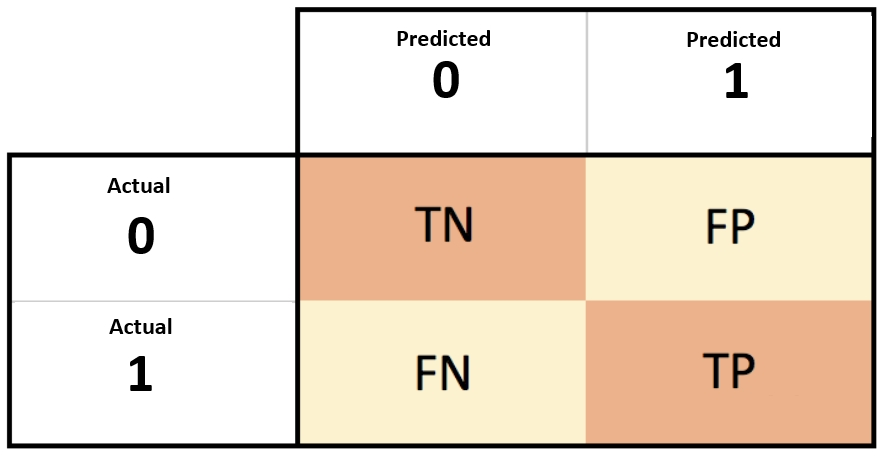

Confusion matrices allow us to quickly and easily measure the performance of our model. The objective is to determine the prediction rate that is accurate as well as the false positives and false negatives. These results are used to calculate the values of **the classification report**.

The classification report gives us 3 characteristics of the model : 

- Accuracy --> (TP/TP+FP) 

Ratio of correctly predicted positive observations to the total of observations predicted by the model for this category. Here we have the percentage of correct responses for each category in relation to the total number of predictions for the category. 

- Recall (or sensitivity) --> (TP/TP+FN) 

Recall is the ratio of the number of correctly predicted positive observations divided by all predicted observations for that category. We have the percentage of correct model response for this category.

- F1 Score --> 2(Recall * Accuracy) / (Recall + Accuracy)

The F1 score is the weighted average of accuracy and recall. This score takes into account both false positives and false negatives. For an unequal distribution of the categories to be predicted (as in this project), it is very useful. The closer the F1-score is to 1, better is the recall and accuracy.


For the target variable "Attrited_flag", we have an imbalance between "Attrited" and "Existing" customers. This parameter leads to a drop in performance during model formation. However, the objective is to build a model capable of better predicting customers who want to withdraw services from the company. 
When we look at the results, the best model is the "**Random Forest Classifier**" because it scored highest on the classification report and in the accuracy.

### 2-2 Improved model performance

To increase the performance of the "Random Forest Classifier" model, we use Sklearn's "Grid search CV". 

Operation of "Grid search CV": Our model is exercised on our data each time these hyperparameters are modified. The "Grid Search CV" tool determines which hyperparameter of the model gives the best score.

In [ ]:
grid_parameter_RFC = {"max_depth": np.arange(1,10)}
grid_RFC = GridSearchCV(estimator = RFC, param_grid = grid_parameter_RFC, cv = 10)

We define in a dictionary the hyperparameters to be tested. To reduce the processing time, we only test the "max_depth" hyperparameter between 1 until 9.

In [ ]:
grid_RFC.fit(X_train, Y_train)

In [ ]:
print("The best params for training the model 'Decision Tree Classifier' in our dataset is :")
print()
grid_RFC.best_params_

In [ ]:
print("Score of prediction in training dataset after adding the best hyperparameter for the model Random Forest Classifier :")
print()
display(grid_RFC.best_estimator_.score(X_train, Y_train))
print()
print("____________________________________________________")
print("Score of the prediction in the test dataset after adding the best estimator for the model Random Forest Classifier:")
print()
display(grid_RFC.best_estimator_.score(X_test, Y_test))

In [ ]:
print(classification_report(Y_test,grid_RFC.best_estimator_.predict(X_test)))

By modifying the hyperparameter with the "Grid Search CV" calculation, we obtain worse results than with the default hyperparameters of Random Forest Classifier". 
However, we have a decrease in predictions in the training dataset. The result is a decrease in overfitting.

# **Conclusion**

In [ ]:
print("The best estimator")
print()
print("For train :")
display(RFC.score(X_train, Y_train))
print("____________________________")
print("For test :")
display(RFC.score(X_test, Y_test))

In [ ]:
print("Classification report of the best model :")
print(classification_report(y_true=Y_test, y_pred= RFC.predict(X_test)))

With a score of 100% for correct prediction on all training data and 96% for all test data, the "Random Forest Classifier" model is the most interesting to use. 
For the "Attrited_customer" category, the model obtains a very good score, with an accuracy of 93%, a recall of 81% and an F1 score of 86% (even if we have an imbalance of the target variable). Moreover, this is a very good score in general. 
For the rest, in order to predict future customers and to predict those who are likely to leave the company's services, the data scientist will use this model among the selected models instead. Thanks to the results obtained by this model, the company can predict in advance the majority of "expected_customers" and take action for these specific customers.

This project answers a real business question. It allows us to observe the role of the data scientist in the company, the different tools he has at his disposal to answer a problem and the way in which he answers it. The rest of the operations will have to be handled by business intelligence.